In [47]:
conda install cartopy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Define the paths to the NetCDF files
path_mod_phy = 'C:/Users/Jerald/Desktop/265.1 Python/data1/global-analysis-forecast-phy-001-024_1634137776889.nc'
path_mod_bio = 'C:/Users/Jerald/Desktop/265.1 Python/data1/global-analysis-forecast-bio-001-028-daily_1634112967258.nc'
path_obs_sst = 'C:/Users/Jerald/Desktop/265.1 Python/data1/METOFFICE-GLO-SST-L4-REP-OBS-SST_1634138873662.nc'
path_obs_bio = 'C:/Users/Jerald/Desktop/265.1 Python/data1/dataset-oc-glo-bio-multi-l4-chl_interpolated_4km_daily-rep_1634138525849.nc'

# Open the NetCDF files
mod_phy = xr.open_dataset(path_mod_phy)
mod_bio = xr.open_dataset(path_mod_bio)
obs_sst = xr.open_dataset(path_obs_sst)
obs_bio = xr.open_dataset(path_obs_bio)

In [51]:
mod_bio

<xarray.Dataset>
Dimensions:    (time: 61, latitude: 81, longitude: 117, depth: 23)
Coordinates:
  * latitude   (latitude) float32 -12.0 -11.75 -11.5 -11.25 ... 7.5 7.75 8.0
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 77.85 92.33 109.7
  * time       (time) datetime64[ns] 2020-02-01T12:00:00 ... 2020-04-01T12:00:00
  * longitude  (longitude) float32 -8.0 -7.75 -7.5 -7.25 ... 20.5 20.75 21.0
Data variables:
    spco2      (time, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
    no3        (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    phyc       (time, depth, latitude, longitude) float32 ...
    si         (time, depth, latitude, longitude) float32 ...
    ph         (time, depth, latitude, longitude) float32 ...
    nppv       (time, depth, latitude, longitude) float32 ...
    fe         (time, depth, latitude, longitude) float32 ...
Attributes: (12/19)
    product:                       GLOBAL_ANALYSIS_FORECAST_BIO_001_028
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         daily mean fields from Global Ocean Biogeo...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    forecast_type:                 forecast
    bulletin_date:                 2021-10-06 00:00:00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [52]:
for i in range(len(mod_phy.time)) :
    
    # Define the caracteristics of the map
    f = plt.figure(figsize=(12, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.right_labels = False
    gl.top_labels = False
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    ax.set_extent([10, 15, -9, -5],crs=ccrs.PlateCarree())
    ax.set_title('Salinity [PSU] on ' + np.datetime_as_string(mod_phy.time[i],unit='h') ,fontsize=24)
        

    # Plot data
    im = ax.pcolor(mod_phy['longitude'].data, mod_phy['latitude'].data,mod_phy['so'].isel(time=[i],depth=[0]).squeeze(),vmin=10,vmax=30,cmap='viridis')

    # Add legend
    f.subplots_adjust(hspace= 0.4,wspace=0.2)
    f.colorbar(im,ax=ax,fraction=0.03, pad=0.04)
    plt.savefig('C:/Users/Jerald/Desktop/265.1 Python/sal_date'+np.datetime_as_string(mod_phy.time[i],unit='h')+'.png')
    plt.close()

In [53]:
import imageio
from pathlib import Path
from IPython.display import Image

In [54]:
# Search imgage files
image_path = Path('C:/Users/Jerald/Desktop/265.1 Python')
images = sorted(image_path.glob('sal_date*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

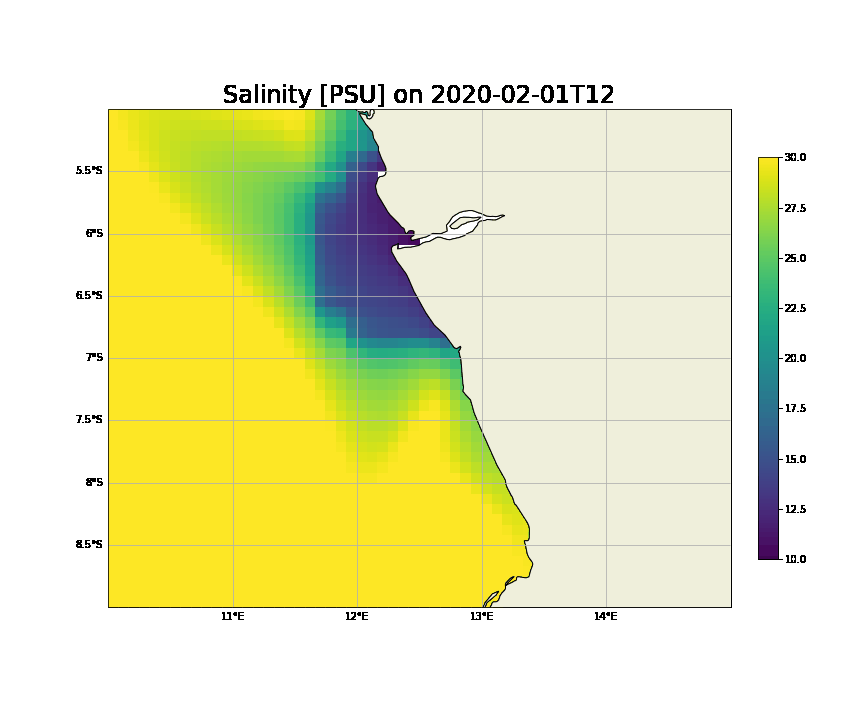

In [55]:
# Save the GIF
imageio.mimwrite('C:/Users/Jerald/Desktop/265.1 Python/animated_sal.gif',image_list,duration=0.5,loop=10)

# Visualisation
with open('C:/Users/Jerald/Desktop/265.1 Python/animated_sal.gif','rb') as f:
    display(Image(data=f.read(),format='png'))

In [56]:
for i in range(len(mod_phy.time)) :
    
    # Define the caracteristics of the map
    f = plt.figure(figsize=(10, 12))
    axs=[]
    axs.append(f.add_subplot(3,2,1,projection=ccrs.PlateCarree()))
    for j in range(4):
        ax = f.add_subplot(3,2,j+3,projection=ccrs.PlateCarree())
        axs.append(ax)
    for ax in axs:
        ax.coastlines()
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.right_labels = False
        gl.top_labels = False
        ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
        ax.set_extent([10, 15, -9, -5],crs=ccrs.PlateCarree())
        
    axs[0].set_title("Salinity [PSU] \n Model ",fontsize=24)
    axs[1].set_title("Temperature [°C] \n Model   ",fontsize=24)
    axs[2].set_title("\n Observation   ",fontsize=24)  
    axs[3].set_title("Chlorophyll [mg/m3] \n Model ",fontsize=24)
    axs[4].set_title("\n Observation ",fontsize=24)  


    # Plot the parameters on maps
    im1 = axs[0].contourf(mod_phy['longitude'].data, mod_phy['latitude'].data,mod_phy['so'].isel(time=[i],depth=[0]).squeeze(),[10,15,20,25,27,40],cmap='viridis',shading='nearest')
    im2 = axs[1].contourf(mod_phy['longitude'].data, mod_phy['latitude'].data,mod_phy['thetao'].isel(time=[i],depth=[0]).squeeze(),[28,29,29.5,30,30.5,31],cmap='plasma',shading='nearest')
    im3 = axs[2].contourf(obs_sst['lon'].data, obs_sst['lat'].data,obs_sst['analysed_sst'].isel(time=[i]).squeeze()-273.15,[28,29,29.5,30,30.5,31],cmap='plasma',shading='nearest')
    im4 = axs[3].contourf(mod_bio['longitude'].data, mod_bio['latitude'].data,mod_bio['chl'].isel(time=[i],depth=[0]).squeeze(),[0,2,3,6,8,10,15],shading='nearest')
    im5 = axs[4].contourf(obs_bio['lon'].data, obs_bio['lat'].data,obs_bio['CHL'].isel(time=[i]).squeeze(),[0,2,3,6,8,10,15],shading='nearest')
  
    # Add legend
    f.subplots_adjust(hspace= 0.4,wspace=0.2)
    f.colorbar(im1,ax=axs[0],fraction=0.03, pad=0.04)
    f.colorbar(im2,ax=axs[1],fraction=0.03, pad=0.04)
    f.colorbar(im3,ax=axs[2],fraction=0.03, pad=0.04)
    f.colorbar(im4,ax=axs[3],fraction=0.03, pad=0.04)
    f.colorbar(im5,ax=axs[4],fraction=0.03, pad=0.04)
    f.suptitle('Date : ' + np.datetime_as_string(mod_phy.time[i],unit='h'),fontsize=20)
    
    plt.savefig('C:/Users/Jerald/Desktop/265.1 Python/sal_temp_chl_date'+np.datetime_as_string(mod_phy.time[i],unit='h')+'.png')
    plt.close()

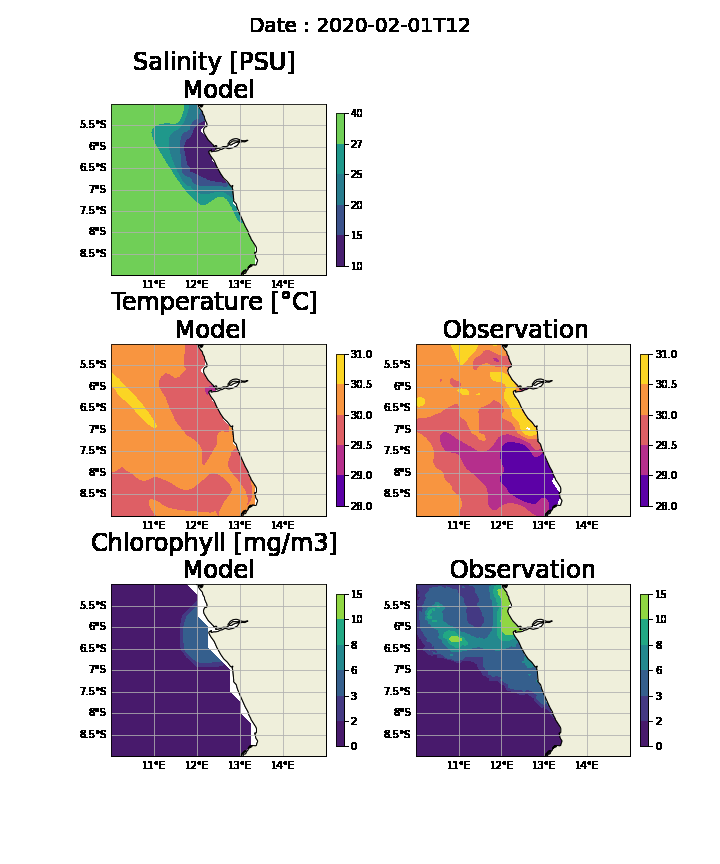

In [57]:
# Search image files
image_path = Path('C:/Users/Jerald/Desktop/265.1 Python/')
images = sorted(image_path.glob('sal_temp*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

# Save the GIF
imageio.mimwrite('C:/Users/Jerald/Desktop/265.1 Python/animated_sal_temp_chl.gif',image_list,duration=1,loop=10)

# Visualisation
with open('C:/Users/Jerald/Desktop/265.1 Python/animated_sal_temp_chl.gif','rb') as f:
    display(Image(data=f.read(),format='png'))

In [58]:
mod_bio

<xarray.Dataset>
Dimensions:    (time: 61, latitude: 81, longitude: 117, depth: 23)
Coordinates:
  * latitude   (latitude) float32 -12.0 -11.75 -11.5 -11.25 ... 7.5 7.75 8.0
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 77.85 92.33 109.7
  * time       (time) datetime64[ns] 2020-02-01T12:00:00 ... 2020-04-01T12:00:00
  * longitude  (longitude) float32 -8.0 -7.75 -7.5 -7.25 ... 20.5 20.75 21.0
Data variables:
    spco2      (time, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
    no3        (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    phyc       (time, depth, latitude, longitude) float32 ...
    si         (time, depth, latitude, longitude) float32 ...
    ph         (time, depth, latitude, longitude) float32 ...
    nppv       (time, depth, latitude, longitude) float32 ...
    fe         (time, depth, latitude, longitude) float32 ...
Attributes: (12/19)
    product:                       GLOBAL_ANALYSIS_FORECAST_BIO_001_028
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         daily mean fields from Global Ocean Biogeo...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    forecast_type:                 forecast
    bulletin_date:                 2021-10-06 00:00:00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [59]:
mod_bio

<xarray.Dataset>
Dimensions:    (time: 61, latitude: 81, longitude: 117, depth: 23)
Coordinates:
  * latitude   (latitude) float32 -12.0 -11.75 -11.5 -11.25 ... 7.5 7.75 8.0
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 77.85 92.33 109.7
  * time       (time) datetime64[ns] 2020-02-01T12:00:00 ... 2020-04-01T12:00:00
  * longitude  (longitude) float32 -8.0 -7.75 -7.5 -7.25 ... 20.5 20.75 21.0
Data variables:
    spco2      (time, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
    no3        (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    phyc       (time, depth, latitude, longitude) float32 ...
    si         (time, depth, latitude, longitude) float32 ...
    ph         (time, depth, latitude, longitude) float32 ...
    nppv       (time, depth, latitude, longitude) float32 ...
    fe         (time, depth, latitude, longitude) float32 ...
Attributes: (12/19)
    product:                       GLOBAL_ANALYSIS_FORECAST_BIO_001_028
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         daily mean fields from Global Ocean Biogeo...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    forecast_type:                 forecast
    bulletin_date:                 2021-10-06 00:00:00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [72]:
for i in range(len(mod_bio.time)) :
    
    # Define the caracteristics of the map
    f = plt.figure(figsize=(12, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.right_labels = False
    gl.top_labels = False
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    ax.set_extent([10, 15, -9, -5],crs=ccrs.PlateCarree())
    ax.set_title('Total Primary Production ' + np.datetime_as_string(mod_phy.time[i],unit='h') ,fontsize=24)
        

    # Plot data
    im = ax.pcolor(mod_bio['longitude'].data, mod_bio['latitude'].data,mod_bio['nppv'].isel(time=[i],depth=[0]).squeeze(),vmin=10,vmax=30,cmap='viridis')

    # Add legend
    f.subplots_adjust(hspace= 0.4,wspace=0.2)
    f.colorbar(im,ax=ax,fraction=0.03, pad=0.04)
    plt.savefig('C:/Users/Jerald/Desktop/265.1 Python/tpp_date'+np.datetime_as_string(mod_bio.time[i],unit='h')+'.png')
    plt.close()

In [73]:
image_path = Path('C:/Users/Jerald/Desktop/265.1 Python')
images = sorted(image_path.glob('tpp_date*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

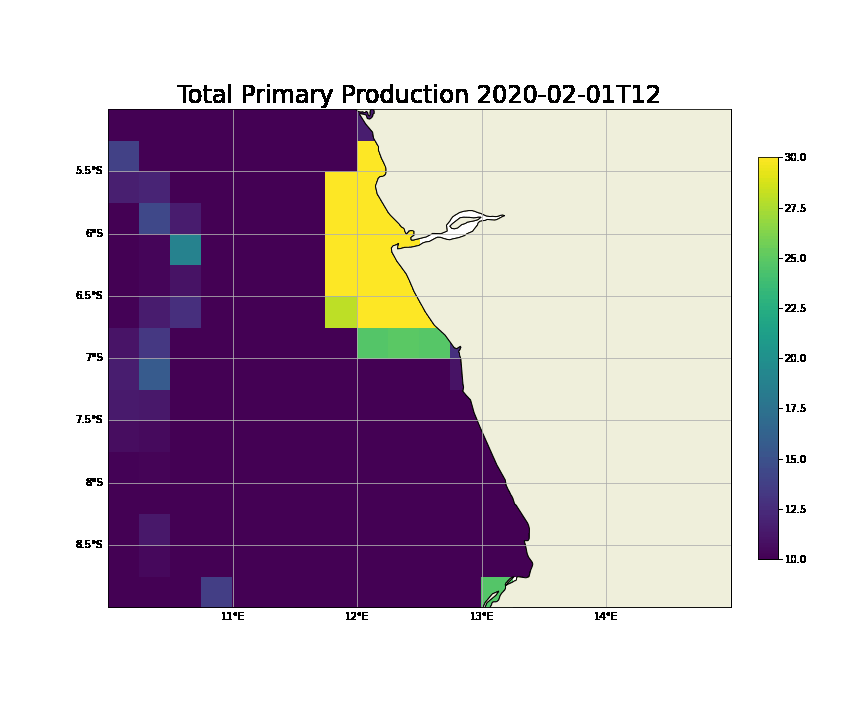

In [74]:
# Save the GIF
imageio.mimwrite('C:/Users/Jerald/Desktop/265.1 Python/animated_tpp.gif',image_list,duration=0.5,loop=10)

# Visualisation
with open('C:/Users/Jerald/Desktop/265.1 Python/animated_tpp.gif','rb') as f:
    display(Image(data=f.read(),format='png'))

In [134]:
for i in range(len(mod_bio.time)) :
    
    # Define the caracteristics of the map
    f = plt.figure(figsize=(10, 12))
    axs=[]
    axs.append(f.add_subplot(3,2,1,projection=ccrs.PlateCarree()))
    for j in range(4):
        ax = f.add_subplot(3,2,j+3,projection=ccrs.PlateCarree())
        axs.append(ax)
    for ax in axs:
        ax.coastlines()
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.right_labels = False
        gl.top_labels = False
        ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
        ax.set_extent([10, 15, -9, -5],crs=ccrs.PlateCarree())
        
    axs[0].set_title("Total Primary Production of Planktons \n Model ",fontsize=16)
    axs[1].set_title("Total Phytoplankton [mmol/m3]\n Model   ",fontsize=16)
    axs[2].set_title("Chlorophyll [mg/m3] \n Model ",fontsize=16)


    # Plot the parameters on maps
    im1 = axs[0].contourf(mod_bio['longitude'].data, mod_bio['latitude'].data,mod_bio['nppv'].isel(time=[i],depth=[0]).squeeze(),vmin=10,vmax=30,cmap='viridis')
    im2 = axs[1].contourf(mod_bio['longitude'].data, mod_bio['latitude'].data,mod_bio['phyc'].isel(time=[i],depth=[0]).squeeze(),vmin=10,vmax=30,cmap='viridis')
    im3 = axs[2].contourf(mod_bio['longitude'].data, mod_bio['latitude'].data,mod_bio['chl'].isel(time=[i],depth=[0]).squeeze(),vmin=1,vmax=15,cmap='viridis')
  
    # Add legend
    f.subplots_adjust(hspace= 0.4,wspace=0.2)
    f.colorbar(im1,ax=axs[0],fraction=0.03, pad=0.04)
    f.colorbar(im2,ax=axs[1],fraction=0.03, pad=0.04)
    f.colorbar(im3,ax=axs[2],fraction=0.03, pad=0.04)
    
    f.suptitle('Date : ' + np.datetime_as_string(mod_bio.time[i],unit='h'),fontsize=20)
    
    plt.savefig('C:/Users/Jerald/Desktop/265.1 Python/nppv_phyc_o2_chl_date'+np.datetime_as_string(mod_bio.time[i],unit='h')+'.png')
    plt.close()

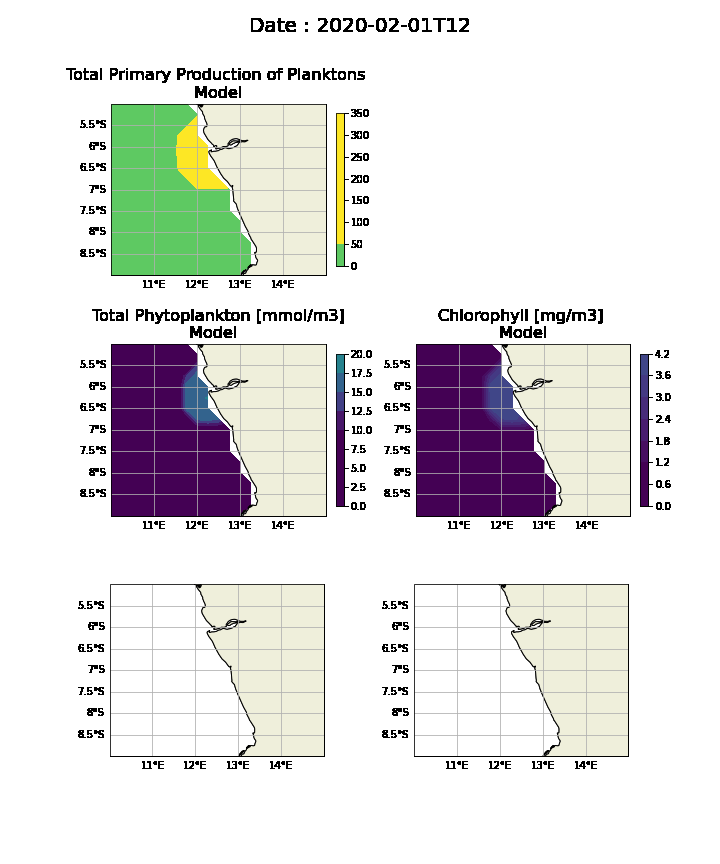

In [136]:
# Search image files
image_path = Path('C:/Users/Jerald/Desktop/265.1 Python/')
images = sorted(image_path.glob('nppv_phyc*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

# Save the GIF
imageio.mimwrite('C:/Users/Jerald/Desktop/265.1 Python/animated_nppv_phyc_o2_chl.gif',image_list,duration=1,loop=10)

# Visualisation
with open('C:/Users/Jerald/Desktop/265.1 Python/animated_nppv_phyc_o2_chl.gif','rb') as f:
    display(Image(data=f.read(),format='png'))

In [118]:
lon_point = 12.3
lat_point =  -6

lon_min_big = 10
lon_max_big = 13.5
lat_min_big = -8.5
lat_max_big = -4.5

lon_min_small = 11.5
lon_max_small = 12.7
lat_min_small = -6.7
lat_max_small = -5.5

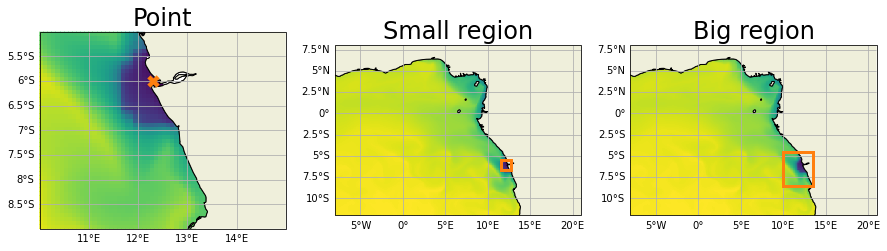

In [119]:
f = plt.figure(figsize=(15, 10))
axs=[]
for j in range(3):
    ax = f.add_subplot(1,3,j+1,projection=ccrs.PlateCarree())
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)#, dms=True)#, x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    ax.set_extent([-8, 21, -12, 8],crs=ccrs.PlateCarree())
    im = ax.pcolor(mod_phy['longitude'].data, mod_phy['latitude'].data,mod_phy['so'].isel(depth=[0],time=[0]).squeeze())
    axs.append(ax)

axs[0].set_extent([10, 15, -9, -5],crs=ccrs.PlateCarree())

axs[0].set_title('Point',fontsize=24)
axs[1].set_title('Small region',fontsize=24)
axs[2].set_title('Big region',fontsize=24)

axs[0].scatter(lon_point,lat_point,transform=ccrs.PlateCarree(),s=150,marker='X',c='tab:orange',linewidths=0.1,zorder=5)
axs[1].add_patch(mpatches.Rectangle(xy=[lon_min_small, lat_min_small], width=lon_max_small-lon_min_small, height=lat_max_small-lat_min_small, linewidth =3, zorder=2 ,edgecolor='tab:orange',facecolor='none',transform=ccrs.PlateCarree()))
axs[2].add_patch(mpatches.Rectangle(xy=[lon_min_big, lat_min_big], width=lon_max_big-lon_min_big, height=lat_max_big-lat_min_big, linewidth =3, zorder=2 ,edgecolor='tab:orange',facecolor='none',transform=ccrs.PlateCarree()))


In [122]:
# Create the masks to extract the regions to study 
prod_big = []
prod_small = []
prod_point = []
prods = [mod_bio,mod_phy,obs_bio,obs_sst]
for prod in prods :
    if 'longitude' in prod.dims:
        lon = 'longitude'
        lat = 'latitude'
    elif 'lon' in prod.dims:
        lon = 'lon'
        lat = 'lat'       

    mask_small = (
        (prod[lon] >= lon_min_small)
        & (prod[lon] <= lon_max_small)
        & (prod[lat] >=lat_min_small)
        & (prod[lat] <=lat_max_small)
        )

    mask_big = (
        (prod[lon] >= lon_min_big)
        & (prod[lon] <= lon_max_big)
        & (prod[lat] >=lat_min_big)
        & (prod[lat] <=lat_max_big)
        )
# Calculate the mean parameter for each product    
    prod_small.append(prod.where(mask_small,drop=True).mean([lon,lat],skipna=True).squeeze())
    prod_big.append(prod.where(mask_big,drop=True).mean([lon,lat],skipna=True).squeeze())
    prod_point.append(prod.sel({lon:12.3,lat:-6},method='nearest'))
    
# Give convenient names to the variables
mod_bio_small = prod_small[0] 
mod_phy_small = prod_small[1] 
obs_bio_small = prod_small[2] 
obs_sst_small = prod_small[3] 

mod_bio_big = prod_big[0]
mod_phy_big = prod_big[1]
obs_bio_big = prod_big[2]
obs_sst_big = prod_big[3]

mod_bio_point = prod_point[0]
mod_phy_point = prod_point[1]
obs_bio_point = prod_point[2]
obs_sst_point = prod_point[3]

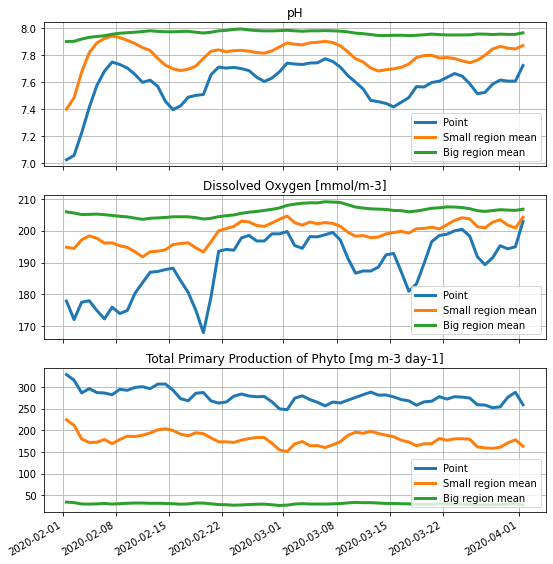

In [131]:
# Define the caracteristics of the plot  
f = plt.figure(figsize=(9, 10))
axs=[]
for j in range(3):
    ax = f.add_subplot(3,1,j+1)
    ax.grid()
    axs.append(ax)

# Plot ph
axs[0].plot(mod_bio_point['time'],mod_bio_point['ph'].isel(depth=[0]),linewidth=3,label='Point')
axs[0].plot(mod_bio_small['time'],mod_bio_small['ph'].isel(depth=[0]),linewidth=3,label='Small region mean')
axs[0].plot(mod_bio_big['time'],mod_bio_big['ph'].isel(depth=[0]),linewidth=3,label='Big region mean')
axs[0].set_title('pH')
f.autofmt_xdate()
axs[0].legend(loc='lower right')


# Plot dissolved oxygen
axs[1].plot(mod_bio_point['time'],mod_bio_point['o2'].isel(depth=[0]),linewidth=3,label='Point')
axs[1].plot(mod_bio_small['time'],mod_bio_small['o2'].isel(depth=[0]),linewidth=3,label='Small region mean')
axs[1].plot(mod_bio_big['time'],mod_bio_big['o2'].isel(depth=[0]),linewidth=3,label='Big region mean')
axs[1].set_title('Dissolved Oxygen [mmol/m-3]')
f.autofmt_xdate()
axs[1].legend(loc='lower right')

# Plot chlorophyll
axs[2].plot(mod_bio_point['time'],mod_bio_point['nppv'].isel(depth=[0]),linewidth=3,label='Point')
axs[2].plot(mod_bio_small['time'],mod_bio_small['nppv'].isel(depth=[0]),linewidth=3,label='Small region mean')
axs[2].plot(mod_bio_big['time'],mod_bio_big['nppv'].isel(depth=[0]),linewidth=3,label='Big region mean')
axs[2].set_title('Total Primary Production of Phyto [mg m-3 day-1]')
f.autofmt_xdate()
axs[2].legend(loc='lower right')

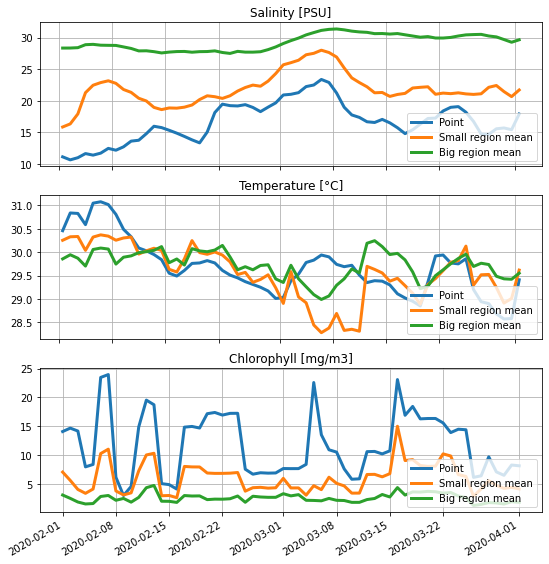

In [124]:
# Define the caracteristics of the plot  
f = plt.figure(figsize=(9, 10))
axs=[]
for j in range(3):
    ax = f.add_subplot(3,1,j+1)
    ax.grid()
    axs.append(ax)

# Plot salinity
axs[0].plot(mod_phy_point['time'],mod_phy_point['so'].isel(depth=[0]),linewidth=3,label='Point')
axs[0].plot(mod_phy_small['time'],mod_phy_small['so'].isel(depth=[0]),linewidth=3,label='Small region mean')
axs[0].plot(mod_phy_big['time'],mod_phy_big['so'].isel(depth=[0]),linewidth=3,label='Big region mean')
axs[0].set_title('Salinity [PSU]')
f.autofmt_xdate()
axs[0].legend(loc='lower right')


# Plot temperature
axs[1].plot(obs_sst_point['time'],obs_sst_point['analysed_sst']-273.15,linewidth=3,label='Point')
axs[1].plot(obs_sst_small['time'],obs_sst_small['analysed_sst']-273.15,linewidth=3,label='Small region mean')
axs[1].plot(obs_sst_big['time'],obs_sst_big['analysed_sst']-273.15,linewidth=3,label='Big region mean')
axs[1].set_title('Temperature [°C]')
f.autofmt_xdate()
axs[1].legend(loc='lower right')

# Plot chlorophyll
axs[2].plot(obs_bio.indexes['time'],obs_bio_point['CHL'],linewidth=3,label='Point')
axs[2].plot(obs_bio_small['time'].data,obs_bio_small['CHL'],linewidth=3,label='Small region mean')
axs[2].plot(obs_bio_big['time'].data,obs_bio_big['CHL'],linewidth=3,label='Big region mean')
axs[2].set_title('Chlorophyll [mg/m3]')
f.autofmt_xdate()
axs[2].legend(loc='lower right')